<a href="https://colab.research.google.com/github/nivyathiruvoth/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

###Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity. Expressions can be classified as positive, negative, or neutral.
###Twitter is one of the most powerful social media platform in the world right now , with 360 million monthly active users and around 500 million tweets sent each day. It is used every day by people to express opinions about different topics, such as products, movies, music, politicians, events, social events, among others.
###Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. It is a global pandemic that is still infecting millions of people around the world . In this project we will be looking at thousand of tweets made on Covid-19 from around the world and will try to predict the sentiment of each of the tweet by classifying them into three categories positive, negative and neutral.

In [146]:
#Libraries for data manipulation
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
import requests
#Libraries to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [147]:
#Other libraries used
import re
import sys
from collections import Counter
from collections import defaultdict

#Now let us mount the drive and load the dataset

In [148]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
#Loading the dataset
tweet_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv',encoding="ISO-8859-1")

In [150]:
#Creating a copy of the dataset
df=tweet_df.copy()

In [151]:
#First look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [152]:
#Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [153]:
#Checking the shape of the dataset
print("The dataset contains",df.shape[0],"rows")
print("The dataset contains",df.shape[1],"columns")

The dataset contains 41157 rows
The dataset contains 6 columns


In [154]:
#Checking for duplicates
print("The number of duplicates are:",len(df[df.duplicated()]))

The number of duplicates are: 0


In [155]:
#Getting count of null values in all the columns
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

###We can observe that only the column 'Location' contains null values. But we are not considering that column for sentiment analysis. Hence there is no need for null value treatment.


##Let's create a word cloud showing the different variables in the given dataset.

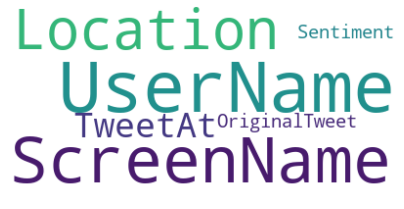

In [156]:
#Storing the column names to make a word cloud
plt.rcParams['figure.figsize']=7,7
text1 = " ".join(title for title in df.columns)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [157]:
#Unique number of values in each column
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

###It is clear that screenName and UserName are unique for each observation in the given dataset. Therefore we will remove them.

In [158]:
#Drop UserName and ScreenName
df.drop(["UserName","ScreenName"],axis=1,inplace=True)

#**Target variable analysis**

###Now, let's analyze the target variable, **Sentiment**

In [159]:
#Checking subcategories of target variable
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

###We ave 5 subcategories for Sentiment, and they are 'Neutral', 'Positive', 'Extremely Negative', 'Negative' and 'Extremely Positive'

In [160]:
#Analysing the number of tweets in each subcategory of target variable
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of tweets')

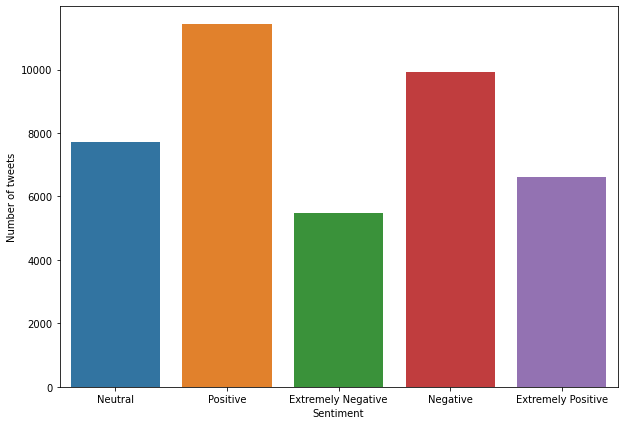

In [161]:
#Setting the heigt and width of the graph
plt.rcParams["figure.figsize"]=10,7
#Plotting the total number of tweets for each subcategory in the target variable
sns.countplot(x="Sentiment", data=df)
plt.ylabel("Number of tweets")

#Converting Sentiment 

###We will convert this 5-class classification problem into a 3-class classification problem by merging Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.

In [162]:
def Sentiment_Grouping(sentiment):

  '''This function will combiner Extremely Positive tweets with Positive Category
     and Extremely Negative tweets with Negative Category'''

  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [163]:
#Apply the Sentiment_Grouping function on the Sentiment column
df["Sentiment"] = df["Sentiment"].apply(Sentiment_Grouping)

In [164]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

###The types of sentiments after grouping are:

###1.Neutral
###2.Positive
###3.Negative

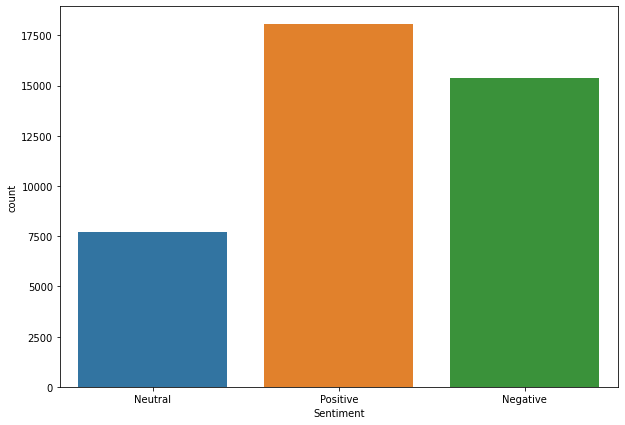

In [165]:
#Plotting the total number of tweets for each subcategory in the target variable after the transformation
plt.rcParams["figure.figsize"]=10,7
sns.countplot(x="Sentiment", data=df)

#Location Analysis

###Let us find out top 10 locations of tweet

In [166]:
#Getting total number of tweets tweeted from all the locations
loc=df['Location'].value_counts().reset_index()
loc.rename(columns={'index':"location","Location":"count"},inplace=True)
loc

,location,count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
...,...,...
12215,"Jersey, UK",1
12216,"raleigh, nc",1
12217,Content is not advice,1
12218,Global Blockchain,1


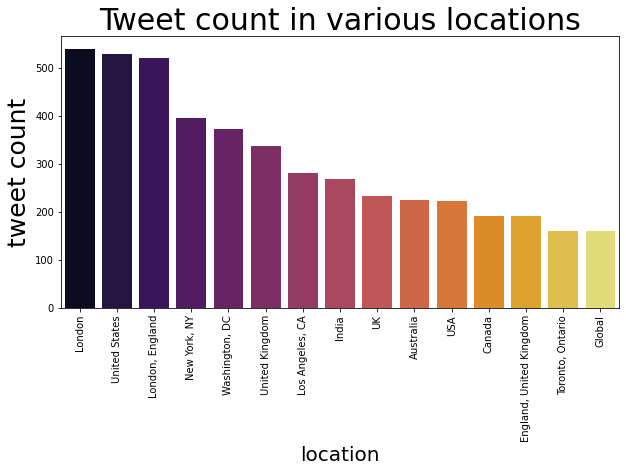

In [167]:
#Plotting number of tweets v/s location
plt.rcParams["figure.figsize"]=(10,5)
sns.barplot(loc["location"][0:15], x = 'location', y =loc["count"][0:15], palette ='inferno').tick_params(axis='x', rotation=90)
plt.title('Tweet count in various locations', fontsize = 30)
plt.xlabel('location', fontsize = 20)
plt.ylabel('tweet count', fontsize = 25)
plt.show()

###Most of the tweets are from United States, London and New York.